# Single & Multiple Linear Regression

This notebook is created for showing an example of linear regression model with OLS(Ordinary Least Squares) method by using statsmodels library. All of the coding done by me with the help of the exercises.

The dataset is provided by 365DataScience team.

### Importing relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

## Simple Linear Regression

- Creating a simple linear regression with the feature size and the response variable price.

In [2]:
slr_data = pd.read_csv('real_estate_price_size.csv')

slr_data.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [3]:
slr_data.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


### Creating the Linear Regression

In [104]:
# Our dependent variable 'y' is going to be price
y = slr_data['price']
# Our independent variable 'x1' is going to be size
x1 = slr_data['size']

In [105]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.742     
Dependent Variable: price            AIC:                2400.6822 
Date:               2022-04-11 15:27 BIC:                2405.8925 
No. Observations:   100              Log-Likelihood:     -1198.3   
Df Model:           1                F-statistic:        285.9     
Df Residuals:       98               Prob (F-statistic): 8.13e-31  
R-squared:          0.745            Scale:              1.5309e+09
-------------------------------------------------------------------
          Coef.     Std.Err.     t    P>|t|    [0.025      0.975]  
-------------------------------------------------------------------
const  101912.6018 11919.2866  8.5502 0.0000 78259.1655 125566.0381
size      223.1787    13.1987 16.9092 0.0000   196.9864    249.3710
-------------------------------------------------------------------
Omnibus:                6.262        Durbin-Watson:           2.267
Prob(Omnibus):          0.044        Jarque-Bera (JB):        2.938
Skew:                   0.117        Prob(JB):                0.230
Kurtosis:               2.194        Condition No.:           2751 
===================================================================
* The condition number is large (3e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

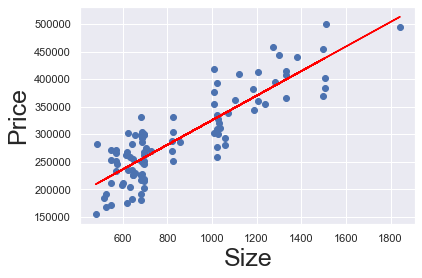

In [108]:
# Plotting the results with the regression line

plt.scatter(x1,y)
yhat = 101912.6 + 223.17*x1
fig = plt.plot(x1, yhat, c='red')
plt.xlabel('Size', fontsize=25)
plt.ylabel('Price', fontsize=25)
plt.show()

## Multiple Linear Regression

- Creating a multiple linear regression with features size, year, view and the response variable price.

In [9]:
mlr_data_raw = pd.read_csv('real_estate_price_size_year_view.csv')

mlr_data_raw.head()

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view


In [10]:
mlr_data_raw.describe(include='all')

,price,size,year,view
count,100.000000,100.000000,100.000000,100
unique,NaN,NaN,NaN,2
top,NaN,NaN,NaN,No sea view
freq,NaN,NaN,NaN,51
mean,292289.470160,853.024200,2012.600000,NaN
std,77051.727525,297.941951,4.729021,NaN
min,154282.128000,479.750000,2006.000000,NaN
25%,234280.148000,643.330000,2009.000000,NaN
50%,280590.716000,696.405000,2015.000000,NaN
75%,335723.696000,1029.322500,2018.000000,NaN


In [12]:
# Creating dummy variables for view column
mlr_data = mlr_data_raw.copy()
mlr_data['view'] = mlr_data['view'].map({'Sea view': 1, 'No sea view': 0})

mlr_data.head()

,price,size,year,view
0,234314.144,643.09,2015,0
1,228581.528,656.22,2009,0
2,281626.336,487.29,2018,1
3,401255.608,1504.75,2015,0
4,458674.256,1275.46,2009,1


### Creating the Multiple Linear Regression

In [97]:
# Our dependent variable 'y' is going to be price
y = mlr_data['price']
# Our independent variables 'x1' are going to be size, year and view
x1 = mlr_data[['size', 'year', 'view']]

In [98]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
==========================================================================
Model:                 OLS                Adj. R-squared:       0.910     
Dependent Variable:    price              AIC:                  2297.2007 
Date:                  2022-04-11 15:21   BIC:                  2307.6214 
No. Observations:      100                Log-Likelihood:       -1144.6   
Df Model:              3                  F-statistic:          335.2     
Df Residuals:          96                 Prob (F-statistic):   1.02e-50  
R-squared:             0.913              Scale:                5.3349e+08
--------------------------------------------------------------------------
          Coef.       Std.Err.     t    P>|t|      [0.025        0.975]   
--------------------------------------------------------------------------
const -5397914.1816 993836.9550 -5.4314 0.0000 -7370664.9453 -3425163.4178
size       223.0316      7.8381 28.4549 0.0000      207.4732      238.5901
year      2718.9489    493.5018  5.5095 0.0000     1739.3556     3698.5422
view     56726.0198   4627.6954 12.2579 0.0000    47540.1171    65911.9225
--------------------------------------------------------------------------
Omnibus:                 29.224          Durbin-Watson:             1.965 
Prob(Omnibus):           0.000           Jarque-Bera (JB):          64.957
Skew:                    1.088           Prob(JB):                  0.000 
Kurtosis:                6.295           Condition No.:             941885
==========================================================================
* The condition number is large (9e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

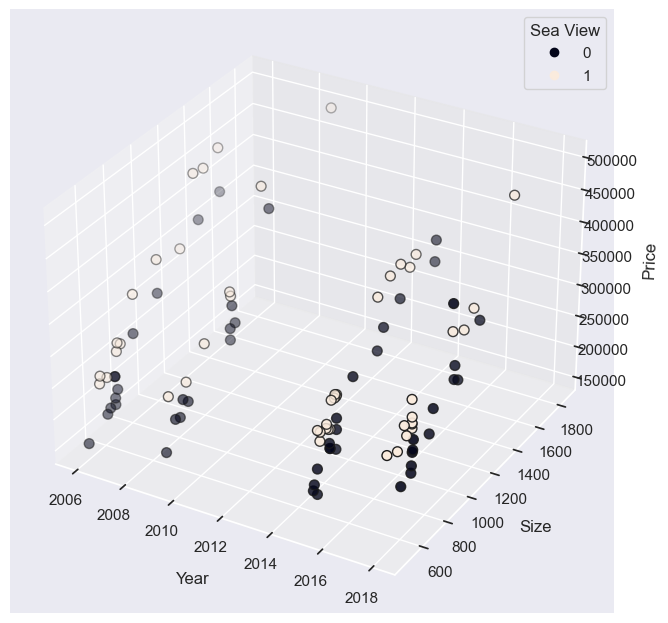

In [170]:
# Plotting the values
plt.figure(figsize=(8,8), dpi=100)
ax = plt.axes(projection='3d')
fig = ax.scatter3D(mlr_data['year'], mlr_data['size'], mlr_data['price'], s=50, edgecolor='k', c=mlr_data['view'])

ax.set_xlabel('Year', labelpad=10)
ax.set_ylabel('Size', labelpad=10)
ax.set_zlabel('Price', labelpad=10)

plt.legend(*fig.legend_elements(), title='Sea View');

### Comparing the Results

If we compare the Adjusted R-squared values;
- *Linear Regression Adj. R^2 :* **0.742**
- *Multiple Linear Regression Adj. R^2 :* **0.910**

We can see that adding 'year' and 'view' features did improved our regression formula as predicted.